In [1]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt
import pandas as pd
from osc_toolkit import oscillation, delayed_oscillation
from models import *
from functools import partial

Simulation of one oscillator, from Nat Chem MH

In [2]:
df_fig4_NatChem_MH = pd.read_csv(r'Data_sets\3a_fig4_osc_NatChem_MH.csv')
cut_off, CMC_3a = 5.25, 1.56
tau = 1.15
C_A2tol = df_fig4_NatChem_MH.loc[0, 'cA2'] + df_fig4_NatChem_MH.loc[0, 'cA'] / 2

df_fig4_NatChem_MH[['cA2', 'cA']] /= C_A2tol
df_fig4_NatChem_MH['cS'] /= CMC_3a

for s in ['TA2', 'TS', 'TA']:
    df_fig4_NatChem_MH[s] /= tau

The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0.92917839 0.00132773 0.14164321]
Initial condition is set as [0.93, 0, 0]
Generating, compiling, and loading C code.
Using default integration parameters.


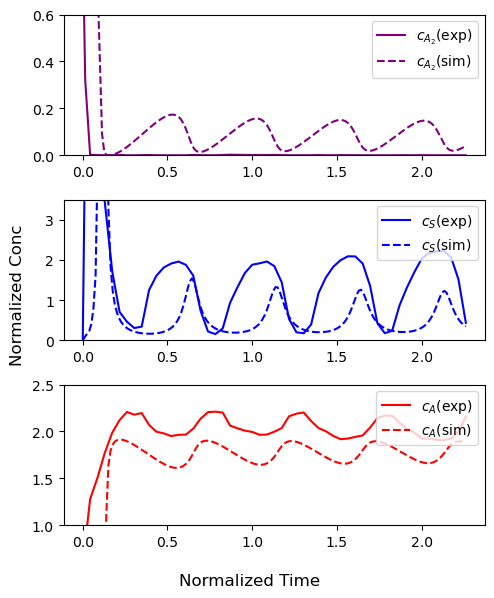

In [3]:
#parameters
rs_ac, rds_ac, rs, rds, ro = 1450, 75, 11, 300, 1e4
rext = 12.6
lam, m = 0.11, 2
td1, td2 = 0.01, 0.03

#Definition of the model
alpha, beta, theta, phi, ep = rs_ac / rext, rds_ac / rext, rs / rext, rds / rext, ro / rext
params = np.array([alpha, beta, theta, phi, ep])
consts = np.array([lam, m])
delay = np.array([td1, td2])
init_cond = np.array([0, 0, 0])
delayed_model_fig4 = delayed_oscillation(delayed_full_first_order, delay=delay, params=params, consts=consts, init_cond=init_cond)
delayed_model_fig4.add_exp_data(df_fig4_NatChem_MH)

#The vars in the ODEs are cA2, cS, cO. Which is different from the experiment data. The initial conditions are set manually.
delayed_model_fig4.set_init_cond([0.93, 0, 0])

fig, axes = delayed_model_fig4.plot(ylim=3, nvars=3, exp=True)
axes[0].set_ylim([0, 0.6])
axes[1].set_ylim([0, 3.5])
axes[2].set_ylim([1, 2.5])
fig.savefig(r'figs\NatChem_MH_fig4.png', dpi=300, bbox_inches='tight')

Steady state

Initial condition is set as [0, 0, 0]
Generating, compiling, and loading C code.
Using default integration parameters.


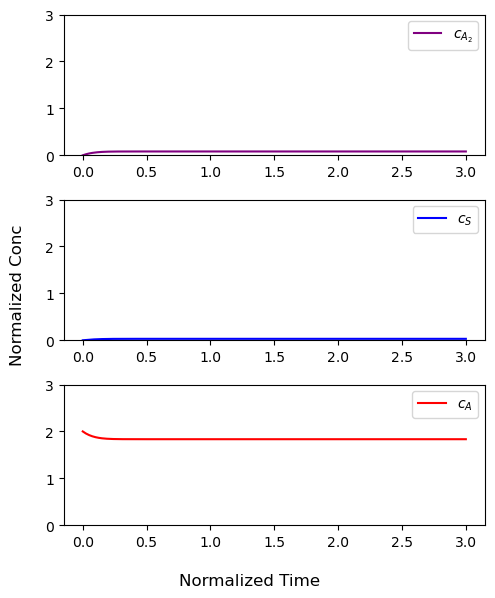

In [4]:
#parameters
rs_ac, rds_ac, rs, rds, ro = 1450, 75, 11, 300, 1e4
rext = 1
lam, m = 0.11, 2
td1, td2 = 0.01, 0.03

#Definition of the model
alpha, beta, theta, phi, ep = rs_ac / rext, rds_ac / rext, rs / rext, rds / rext, ro / rext
params = np.array([alpha, beta, theta, phi, ep])
consts = np.array([lam, m])
delay = np.array([td1, td2])
init_cond = np.array([0, 0, 0])
delayed_model_steady = delayed_oscillation(delayed_full_first_order, delay=delay, params=params, consts=consts, init_cond=init_cond)

#The vars in the ODEs are cA2, cS, cO. Which is different from the experiment data. The initial conditions are set manually.
delayed_model_steady.set_init_cond([0, 0, 0])

fig, axes = delayed_model_steady.plot(ylim=3, nvars=3, t=3)
#fig.savefig(r'figs\steady state.png', dpi=300, bbox_inches='tight')

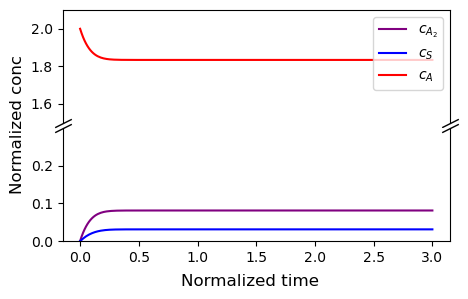

In [13]:
t = axes[0].get_lines()[0].get_xdata()
cA2 = axes[0].get_lines()[0].get_ydata()
cS = axes[1].get_lines()[0].get_ydata()
cA = axes[2].get_lines()[0].get_ydata()
fig, ax = plt.subplots(2, 1, figsize=(5, 3), sharex=True)
fig.subplots_adjust(hspace=0.05)

for a in ax:
    a.plot(t, cA2, label='$c_{A_2}$', color='purple')
    a.plot(t, cS, label='$c_S$', color='blue')
    a.plot(t, cA, label='$c_A$', color='red')

ax[0].spines.bottom.set_visible(False)
ax[1].spines.top.set_visible(False)
ax[0].tick_params(bottom=False)

ax[0].set_ylim(1.5, 2.1)
ax[1].set_ylim(0, 0.3)

ax[1].set_yticks([0, 0.1, 0.2])

ax[0].legend(loc=1)

d = 0.5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax[0].plot([0, 1], [0, 0], transform=ax[0].transAxes, **kwargs)
ax[1].plot([0, 1], [1, 1], transform=ax[1].transAxes, **kwargs)

fig.supxlabel('Normalized time', y=-0.05)
fig.supylabel('Normalized conc')
fig.savefig(r'figs\steady state.png', dpi=300, bbox_inches='tight')

Control of oscillation

Oxidant input rate

In [48]:
files = [r'Data_sets/3a_fig3b_25_osc_NatChem_MH.csv', r'Data_sets/3a_fig3b_50_osc_NatChem_MH.csv', r'Data_sets/3a_fig3b_101_osc_NatChem_MH.csv']

df_MH_NatChem_fig3b_25, df_MH_NatChem_fig3b_50, df_MH_NatChem_fig3b_101 = [pd.read_csv(file) for file in files]
df_list = [df_MH_NatChem_fig3b_25, df_MH_NatChem_fig3b_50, df_MH_NatChem_fig3b_101]

cA2_tol = 14.5
CMC_3a = 1.56
tau = [2.1, 1, 0.52]

for tau, df in zip(tau, df_list):
    df['c3a'] /= CMC_3a
    df['Time'] /= tau
    df['t'] /= tau

The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0.9 0. ]
Initial condition is set as [0.9, 0, 0]
Generating, compiling, and loading C code.
Using default integration parameters.


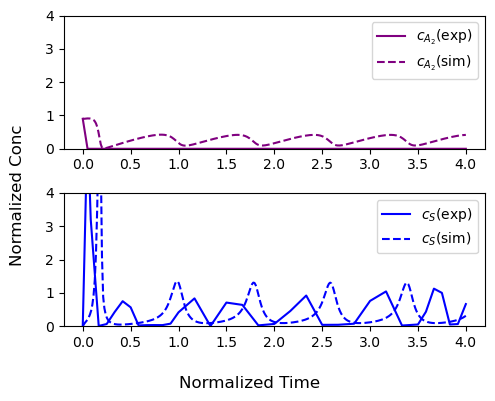

In [88]:
#parameters
rs_ac, rds_ac, rs, rds, ro = 462, 420, 9, 280, 1e4
rext = 14
lam, m = 0.11, 2
td1, td2 = 0.01, 0.03

#Definition of the model
alpha, beta, theta, phi, ep = rs_ac / rext, rds_ac / rext, rs / rext, rds / rext, ro / rext
params = np.array([alpha, beta, theta, phi, ep])
consts = np.array([lam, m])
delay = np.array([td1, td2])
init_cond = np.array([0.9, 0, 0])
delayed_model_50 = delayed_oscillation(delayed_full_first_order, delay, params, consts, init_cond)
delayed_model_50.add_exp_data(df_MH_NatChem_fig3b_50)
delayed_model_50.set_init_cond([0.9, 0, 0])
fig50, axes50 = delayed_model_50.plot(ylim=4, t=4, exp=True)

The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0.9 0. ]
Initial condition is set as [0.9, 0, 0]
Generating, compiling, and loading C code.
Using default integration parameters.


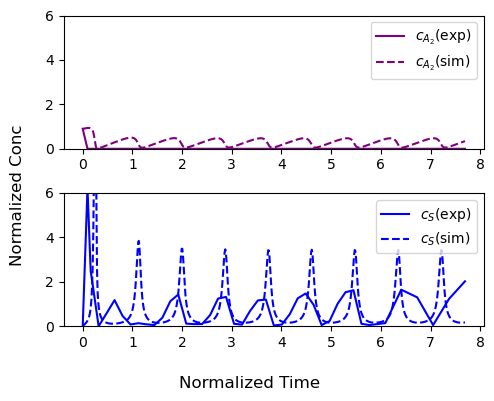

In [89]:
#parameters
rs_ac, rds_ac, rs, rds, ro = 462, 420, 9, 280, 1e4
rext = 28
lam, m = 0.11, 2
td1, td2 = 0.01, 0.03

#Definition of the model
alpha, beta, theta, phi, ep = rs_ac / rext, rds_ac / rext, rs / rext, rds / rext, ro / rext
params = np.array([alpha, beta, theta, phi, ep])
consts = np.array([lam, m])
delay = np.array([td1, td2])
init_cond = np.array([0.9, 0, 0])
delayed_model_101 = delayed_oscillation(delayed_full_first_order, delay, params, consts, init_cond)
delayed_model_101.add_exp_data(df_MH_NatChem_fig3b_101)
delayed_model_101.set_init_cond([0.9, 0, 0])
fig101, axes101 = delayed_model_101.plot(ylim=6, t=8, exp=True)

The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0.9 0. ]
Initial condition is set as [0.9, 0, 0]
Generating, compiling, and loading C code.
Using default integration parameters.


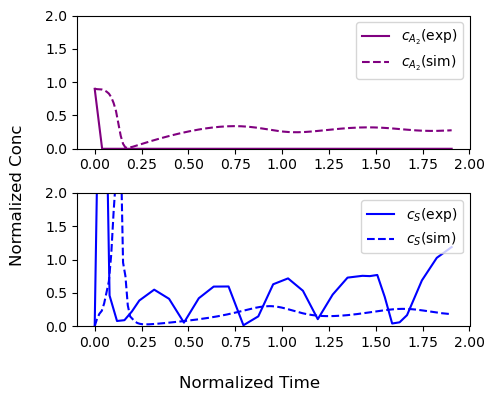

In [90]:
#parameters
rs_ac, rds_ac, rs, rds, ro = 462, 420, 9, 280, 1e4
rext = 7
lam, m = 0.11, 2
td1, td2 = 0.01, 0.03

#Definition of the model
alpha, beta, theta, phi, ep = rs_ac / rext, rds_ac / rext, rs / rext, rds / rext, ro / rext
params = np.array([alpha, beta, theta, phi, ep])
consts = np.array([lam, m])
delay = np.array([td1, td2])
init_cond = np.array([0.9, 0, 0])
delayed_model_25 = delayed_oscillation(delayed_full_first_order, delay, params, consts, init_cond)
delayed_model_25.add_exp_data(df_MH_NatChem_fig3b_25)
delayed_model_25.set_init_cond([0.9, 0, 0])
fig25, axes25 = delayed_model_25.plot(ylim=2, t=4, exp=True)

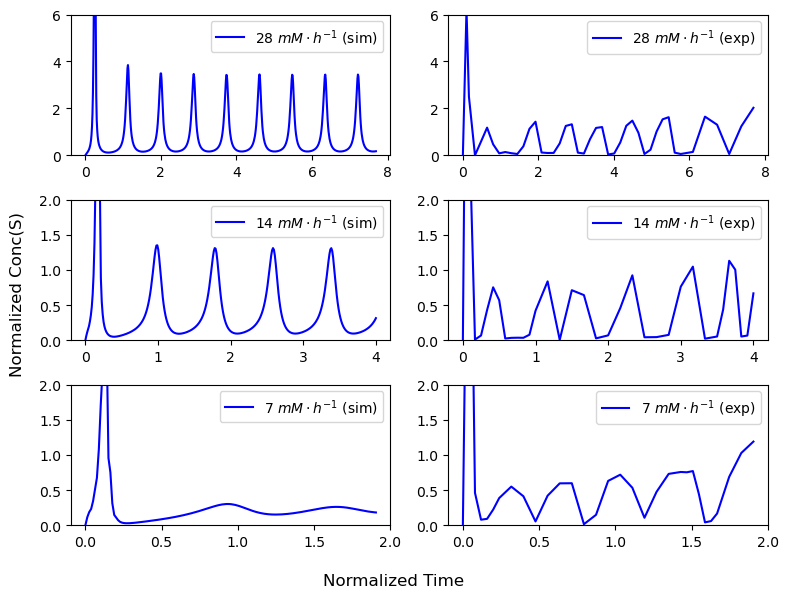

In [164]:
fig, ax = plt.subplots(3, 2, figsize=(8, 6))
axlist = [axes101, axes50, axes25]
legend = ['$28 \ mM \cdot h^{-1}$', '$14 \ mM \cdot h^{-1}$', '$7 \ mM \cdot h^{-1}$']
for r in range(3):
    ax[r, 0].plot(axlist[r][1].lines[1].get_xdata(), axlist[r][1].lines[1].get_ydata(), color='b', label=legend[r] + ' (sim)')
    ax[r, 0].legend(loc=1)
for r in range(3):
    ax[r, 1].plot(axlist[r][1].lines[0].get_xdata(), axlist[r][1].lines[0].get_ydata(), color='b', label=legend[r] + ' (exp)')
    ax[r, 1].legend(loc=1)
fig.supylabel('Normalized Conc(S)')
fig.supxlabel('Normalized Time')
ax[0, 0].set_ylim(0, 6)
ax[1, 0].set_ylim(0, 2)
ax[2, 0].set_ylim(0, 2)

ax[0, 1].set_ylim(0, 6)
ax[1, 1].set_ylim(0, 2)
ax[2, 1].set_ylim(0, 2)
plt.tight_layout()

fig.savefig(r'figs\h2o2 input.png', dpi=300, bbox_inches='tight')

Stirring rate

In [135]:
files = [r'Data_sets\3a_fig2d_300rpm_osc_Chem_MH.csv', r'Data_sets\3a_fig2d_600rpm_osc_Chem_MH.csv', r'Data_sets\3a_fig2d_1200rpm_osc_Chem_MH.csv']

df_MH_Chem_fig2d_300rpm, df_MH_Chem_fig2d_600rpm, df_MH_Chem_fig2d_1200rpm = [pd.read_csv(file) for file in files]
df_list = [df_MH_Chem_fig2d_300rpm, df_MH_Chem_fig2d_600rpm, df_MH_Chem_fig2d_1200rpm]

cA2_tol = 14.5
CMC_3a = 1.56
rext = 14
tau = cA2_tol / rext

for df in df_list:
    df['cS'] /= CMC_3a
    df['tS'] /= tau
    df['tA2'] /= tau

The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0. 0.]
Initial condition is set as [0, 0, 0]
Generating, compiling, and loading C code.
Using default integration parameters.


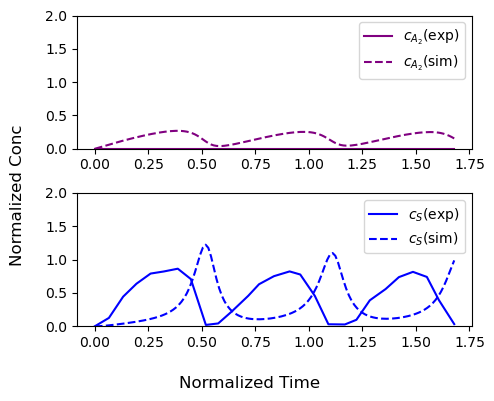

In [174]:
#parameters
rs_ac, rds_ac, rs, rds, ro = 980, 350, 16.1, 333, 1e4
rext = 14
lam, m = 0.11, 2
td1, td2 = 0.01, 0.03

#Definition of the model
alpha, beta, theta, phi, ep = rs_ac / rext, rds_ac / rext, rs / rext, rds / rext, ro / rext
params = np.array([alpha, beta, theta, phi, ep])
consts = np.array([lam, m])
delay = np.array([td1, td2])

init_cond = np.array([0, 0, 0])
delayed_model_stirr1 = delayed_oscillation(delayed_full_first_order, delay, params, consts, init_cond)
delayed_model_stirr1.add_exp_data(df_MH_Chem_fig2d_300rpm)
delayed_model_stirr1.set_init_cond([0, 0, 0])
fig1, axes1 = delayed_model_stirr1.plot(ylim=2, t=3, exp=True)

The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0. 0.]
Initial condition is set as [0, 0, 0]
Generating, compiling, and loading C code.
Using default integration parameters.


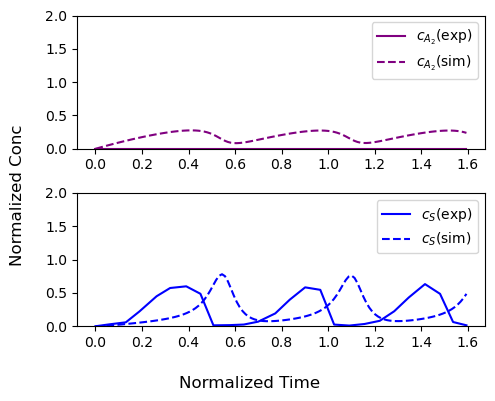

In [175]:
#Faster stirring
k1 = 1.1
k2 = 1.4
n = 2

#parameters
rs_ac, rds_ac, rs, rds, ro = 980, 350, 16.1, 333, 1e4
rext = 14
lam, m = 0.11, 2
td1, td2 = 0.01, 0.03

#Definition of the model
alpha, beta, theta, phi, ep = rs_ac * k1 / rext, rds_ac * k2 / rext, rs * k1 / rext, rds * k2 / rext, ro / rext
params = np.array([alpha, beta, theta, phi, ep])
consts = np.array([lam, m])
delay = np.array([td1, td2]) / n

init_cond = np.array([0, 0, 0])
delayed_model_stirr2 = delayed_oscillation(delayed_full_first_order, delay, params, consts, init_cond)
delayed_model_stirr2.add_exp_data(df_MH_Chem_fig2d_600rpm)
delayed_model_stirr2.set_init_cond([0, 0, 0])
fig2, axes2 = delayed_model_stirr2.plot(ylim=2, t=3, exp=True)

The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0. 0.]
Initial condition is set as [0, 0, 0]
Generating, compiling, and loading C code.
Using default integration parameters.


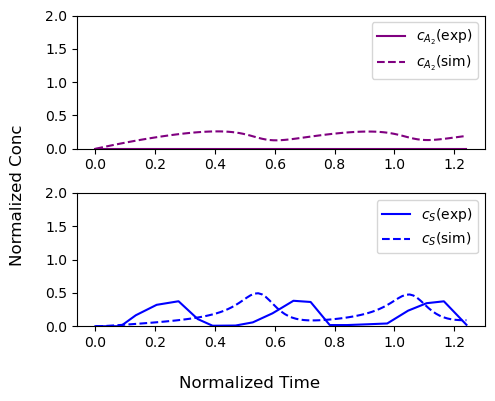

In [176]:
#More faster stirring
k1 = 1.3
k2 = 1.7
n = 3

#parameters
rs_ac, rds_ac, rs, rds, ro = 980, 350, 16.1, 333, 1e4
rext = 14
lam, m = 0.11, 2
td1, td2 = 0.01, 0.03

#Definition of the model
alpha, beta, theta, phi, ep = rs_ac * k1 / rext, rds_ac * k2 / rext, rs * k1 / rext, rds * k2 / rext, ro / rext
params = np.array([alpha, beta, theta, phi, ep])
consts = np.array([lam, m])
delay = np.array([td1, td2]) / n

init_cond = np.array([0, 0, 0])
delayed_model_stirr3 = delayed_oscillation(delayed_full_first_order, delay, params, consts, init_cond)
delayed_model_stirr3.add_exp_data(df_MH_Chem_fig2d_1200rpm)
delayed_model_stirr3.set_init_cond([0, 0, 0])
fig3, axes3 = delayed_model_stirr3.plot(ylim=2, t=3, exp=True)

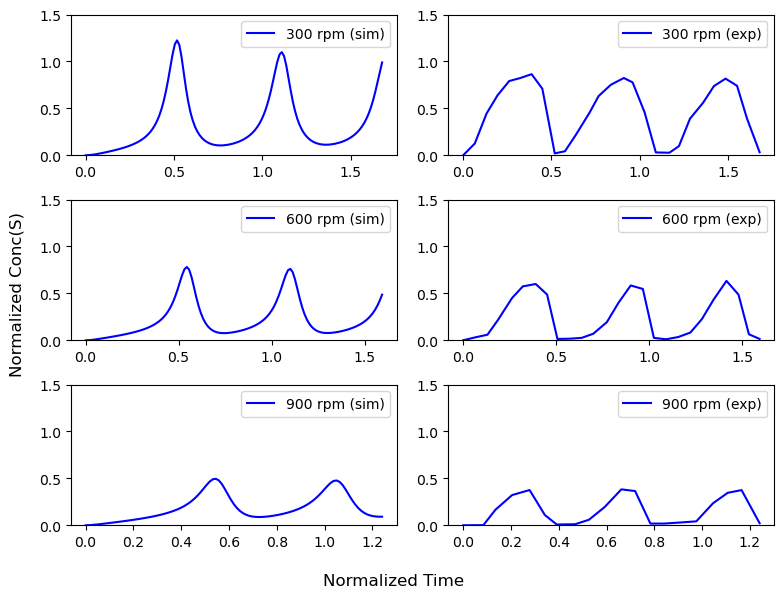

In [178]:
fig, ax = plt.subplots(3, 2, figsize=(8, 6))
axlist = [axes1, axes2, axes3]
legend = ['300 rpm', '600 rpm', '900 rpm']
for r in range(3):
    ax[r, 0].plot(axlist[r][1].lines[1].get_xdata(), axlist[r][1].lines[1].get_ydata(), color='b', label=legend[r] + ' (sim)')
    ax[r, 0].legend(loc=1)
for r in range(3):
    ax[r, 1].plot(axlist[r][1].lines[0].get_xdata(), axlist[r][1].lines[0].get_ydata(), color='b', label=legend[r] + ' (exp)')
    ax[r, 1].legend(loc=1)
fig.supylabel('Normalized Conc(S)')
fig.supxlabel('Normalized Time')
ax[0, 0].set_ylim(0, 1.5)
ax[1, 0].set_ylim(0, 1.5)
ax[2, 0].set_ylim(0, 1.5)

ax[0, 1].set_ylim(0, 1.5)
ax[1, 1].set_ylim(0, 1.5)
ax[2, 1].set_ylim(0, 1.5)
plt.tight_layout()

fig.savefig(r'figs\stirring.png', dpi=300, bbox_inches='tight')

DMAP conc

In [149]:
files = [r'Data_sets\3a_fig3a_2pctg_osc_NatChem_MH.csv', r'Data_sets\3a_fig3a_20pctg_osc_NatChem_MH.csv', r'Data_sets\3a_fig3a_200pctg_osc_NatChem_MH.csv', r'Data_sets\3a_fig3a_400pctg_osc_NatChem_MH.csv']

df_MH_Chem_fig3a_2pctg, df_MH_Chem_fig3a_20pctg, df_MH_Chem_fig3a_200pctg, df_MH_Chem_fig3a_400pctg = [pd.read_csv(file) for file in files]
df_list = [df_MH_Chem_fig3a_2pctg, df_MH_Chem_fig3a_20pctg, df_MH_Chem_fig3a_200pctg, df_MH_Chem_fig3a_400pctg]

cA2_tol = 14.5
CMC_3a = 1.56
rext = 12.6
tau = cA2_tol / rext

for df in df_list:
    df['cS'] /= CMC_3a
    df['timeS'] /= tau
    df['timeA2'] /= tau

The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0.9 0. ]
Initial condition is set as [0.9, 0, 0]
Generating, compiling, and loading C code.
Using default integration parameters.


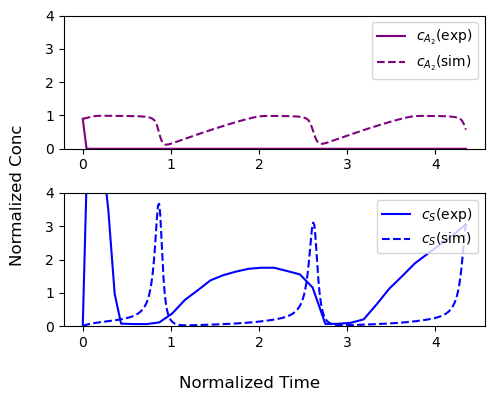

In [169]:
#DMAP 2 mol%
k1 = 1
k2 = 1

#parameters
rs_ac, rds_ac, rs, rds, ro = 163.8, 403.2, 2.5, 265, 1e4
rext = 12.6
lam, m = 0.11, 2
td1, td2 = 0.01, 0.03

#Definition of the model
alpha, beta, theta, phi, ep = rs_ac * k1 / rext, rds_ac * k2 / rext, rs * k1 / rext, rds * k2 / rext, ro / rext
params = np.array([alpha, beta, theta, phi, ep])
consts = np.array([lam, m])
delay = np.array([td1, td2])

init_cond = np.array([0.9, 0, 0])
delayed_model_dmap_2pct = delayed_oscillation(delayed_full_first_order, delay, params, consts, init_cond)
delayed_model_dmap_2pct.add_exp_data(df_MH_Chem_fig3a_2pctg)
delayed_model_dmap_2pct.set_init_cond([0.9, 0, 0])
fig1, axes1 = delayed_model_dmap_2pct.plot(ylim=4, t=4, exp=True)

The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0.9 0. ]
Initial condition is set as [0.9, 0, 0]
Generating, compiling, and loading C code.
Using default integration parameters.


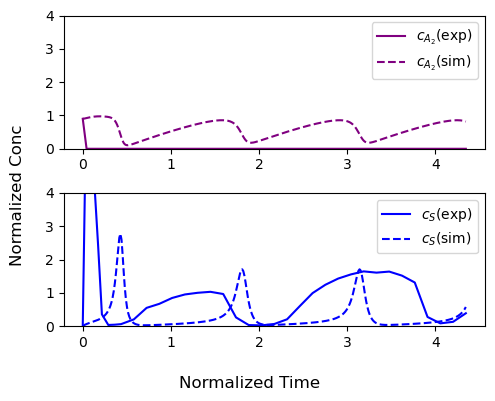

In [170]:
#DMAP 20 mol%
k1 = 1.5
k2 = 1.2

#parameters
rs_ac, rds_ac, rs, rds, ro = 163.8, 403.2, 2.5, 265, 1e4
rext = 12.6
lam, m = 0.11, 2
td1, td2 = 0.01, 0.03

#Definition of the model
alpha, beta, theta, phi, ep = rs_ac * k1 / rext, rds_ac * k2 / rext, rs * k1 / rext, rds * k2 / rext, ro / rext
params = np.array([alpha, beta, theta, phi, ep])
consts = np.array([lam, m])
delay = np.array([td1, td2])

init_cond = np.array([0.9, 0, 0])
delayed_model_dmap_20pct = delayed_oscillation(delayed_full_first_order, delay, params, consts, init_cond)
delayed_model_dmap_20pct.add_exp_data(df_MH_Chem_fig3a_20pctg)
delayed_model_dmap_20pct.set_init_cond([0.9, 0, 0])
fig2, axes2 = delayed_model_dmap_20pct.plot(ylim=4, t=4, exp=True)

The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0.9 0. ]
Initial condition is set as [0.9, 0, 0]
Generating, compiling, and loading C code.
Using default integration parameters.


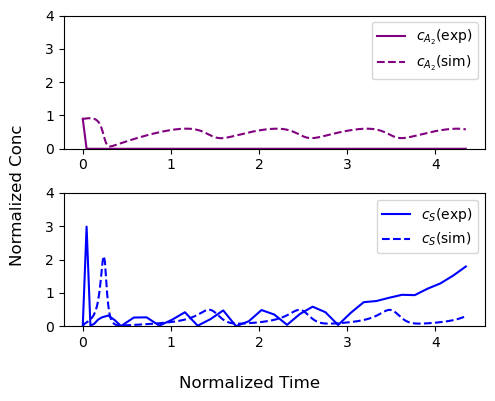

In [171]:
#DMAP 200 mol%
k1 = 3
k2 = 1.8

#parameters
rs_ac, rds_ac, rs, rds, ro = 163.8, 403.2, 2.5, 265, 1e4
rext = 12.6
lam, m = 0.11, 2
td1, td2 = 0.01, 0.03

#Definition of the model
alpha, beta, theta, phi, ep = rs_ac * k1 / rext, rds_ac * k2 / rext, rs * k1 / rext, rds * k2 / rext, ro / rext
params = np.array([alpha, beta, theta, phi, ep])
consts = np.array([lam, m])
delay = np.array([td1, td2])

init_cond = np.array([0.9, 0, 0])
delayed_model_dmap_200pct = delayed_oscillation(delayed_full_first_order, delay, params, consts, init_cond)
delayed_model_dmap_200pct.add_exp_data(df_MH_Chem_fig3a_200pctg)
delayed_model_dmap_200pct.set_init_cond([0.9, 0, 0])
fig3, axes3 = delayed_model_dmap_200pct.plot(ylim=4, t=4, exp=True)

The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0.9 0. ]
Initial condition is set as [0.9, 0, 0]
Generating, compiling, and loading C code.
Using default integration parameters.


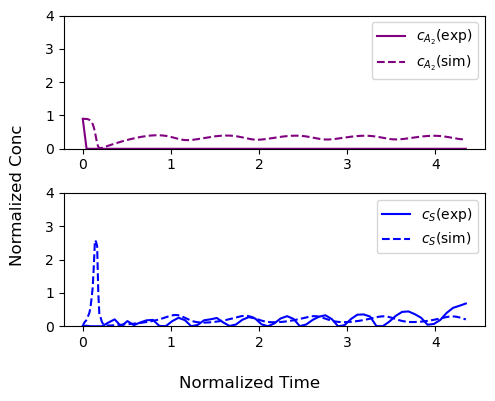

In [172]:
#DMAP 400 mol%
k1 = 5
k2 = 2

#parameters
rs_ac, rds_ac, rs, rds, ro = 163.8, 403.2, 2.5, 265, 1e4
rext = 12.6
lam, m = 0.11, 2
td1, td2 = 0.01, 0.03

#Definition of the model
alpha, beta, theta, phi, ep = rs_ac * k1 / rext, rds_ac * k2 / rext, rs * k1 / rext, rds * k2 / rext, ro / rext
params = np.array([alpha, beta, theta, phi, ep])
consts = np.array([lam, m])
delay = np.array([td1, td2])

init_cond = np.array([0.9, 0, 0])
delayed_model_dmap_400pct = delayed_oscillation(delayed_full_first_order, delay, params, consts, init_cond)
delayed_model_dmap_400pct.add_exp_data(df_MH_Chem_fig3a_400pctg)
delayed_model_dmap_400pct.set_init_cond([0.9, 0, 0])
fig4, axes4 = delayed_model_dmap_400pct.plot(ylim=4, t=4, exp=True)

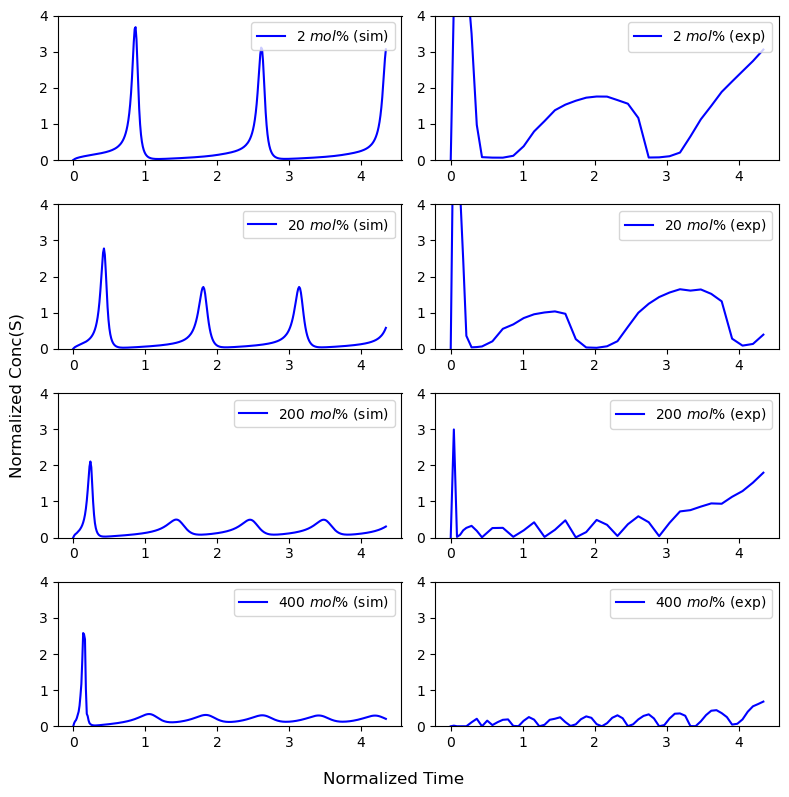

In [173]:
fig, ax = plt.subplots(4, 2, figsize=(8, 8))
axlist = [axes1, axes2, axes3, axes4]
legend = ['$2 \ mol\%$', '$20 \ mol\%$', '$200 \ mol\%$', '$400 \ mol\%$']
for r in range(4):
    ax[r, 0].plot(axlist[r][1].lines[1].get_xdata(), axlist[r][1].lines[1].get_ydata(), color='b', label=legend[r] + ' (sim)')
    ax[r, 0].legend(loc=1)
    ax[r, 0].set_ylim(0, 4)
for r in range(4):
    ax[r, 1].plot(axlist[r][1].lines[0].get_xdata(), axlist[r][1].lines[0].get_ydata(), color='b', label=legend[r] + ' (exp)')
    ax[r, 1].legend(loc=1)
    ax[r, 1].set_ylim(0, 4)
fig.supylabel('Normalized Conc(S)')
fig.supxlabel('Normalized Time')

plt.tight_layout()

fig.savefig(r'figs\dmap.png', dpi=300, bbox_inches='tight')